In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Mount Google Drive and load data
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Colab files/diabetes.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Sample mean Glucose: 116.64
Population mean Glucose: 120.89
Sample max Glucose: 183
Population max Glucose: 199


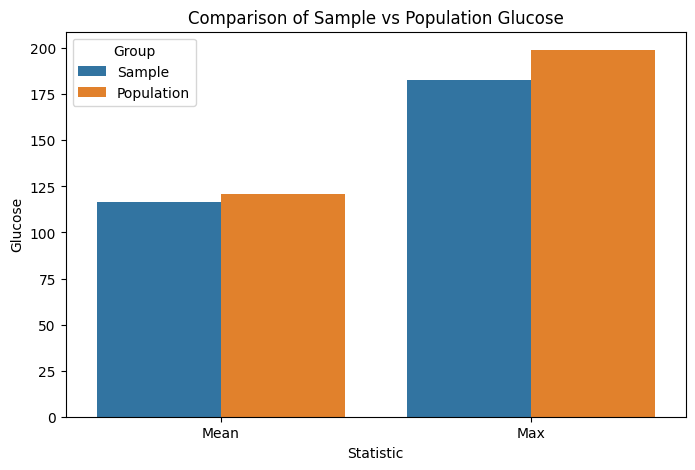

In [5]:
# set seed for reproducibility
np.random.seed(42)

# Random sample of 25
sample = df.sample(n=25)

# Calculate mean and max Glucose values for sample
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Calculate mean and max Glucose values for population
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

# Print values
print(f"Sample mean Glucose: {sample_mean_glucose:.2f}")
print(f"Population mean Glucose: {pop_mean_glucose:.2f}")
print(f"Sample max Glucose: {sample_max_glucose}")
print(f"Population max Glucose: {pop_max_glucose}")

# Plot
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Max'],
    'Sample': [sample_mean_glucose, sample_max_glucose],
    'Population': [pop_mean_glucose, pop_max_glucose]
})

stats_df_melted = stats_df.melt(id_vars='Statistic', var_name='Group', value_name='Glucose')

plt.figure(figsize=(8,5))
sns.barplot(x='Statistic', y='Glucose', hue='Group', data=stats_df_melted)
plt.title('Comparison of Sample vs Population Glucose')
plt.savefig('sample_vs_population_glucose.png', dpi=300, bbox_inches='tight')
plt.show()


Sample 98th percentile BMI: 40.25
Population 98th percentile BMI: 47.53


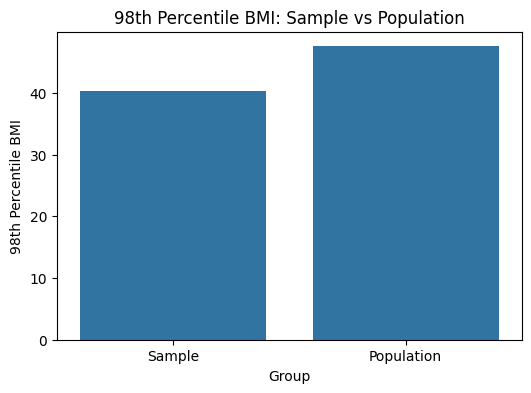

In [7]:
# 98th percentile for BMI
sample_bmi_98 = np.percentile(sample['BMI'], 98)
pop_bmi_98 = np.percentile(df['BMI'], 98)

print(f"Sample 98th percentile BMI: {sample_bmi_98:.2f}")
print(f"Population 98th percentile BMI: {pop_bmi_98:.2f}")

# Plot
bmi_df = pd.DataFrame({
    'Group': ['Sample', 'Population'],
    '98th Percentile BMI': [sample_bmi_98, pop_bmi_98]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Group', y='98th Percentile BMI', data=bmi_df)
plt.title('98th Percentile BMI: Sample vs Population')
plt.savefig('bmi_98th_percentile_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



=== Bootstrap Results (average of 500 samples) ===
Average Bootstrap Mean BloodPressure: 69.10
Average Bootstrap Std BloodPressure: 19.26
Average Bootstrap 98th Percentile BloodPressure: 98.01

=== Population Statistics ===
Population Mean BloodPressure: 69.11
Population Std BloodPressure: 19.36
Population 98th Percentile BloodPressure: 99.32


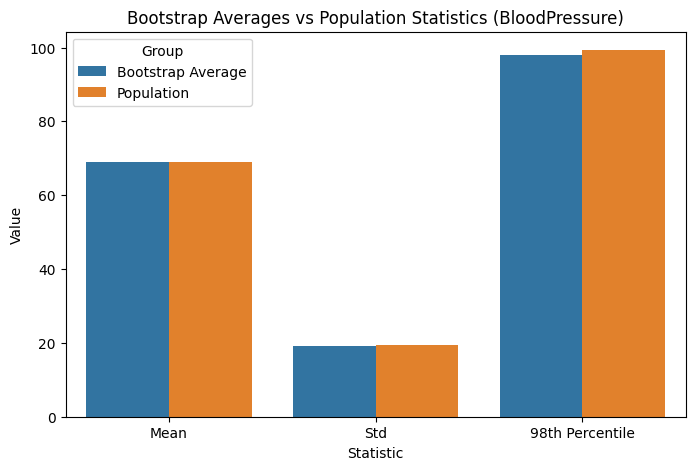

In [9]:
# Bootstrap Sampling
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    sample = df.sample(n=150, replace=True)
    mean_bp = sample['BloodPressure'].mean()
    std_bp = sample['BloodPressure'].std()
    perc_98_bp = np.percentile(sample['BloodPressure'], 98)

    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles.append(perc_98_bp)

# Calculate bootstrap averages
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_98th = np.mean(bootstrap_percentiles)

# Calculate population statistics
pop_mean_bp = df['BloodPressure'].mean()
pop_std_bp = df['BloodPressure'].std()
pop_98th_bp = np.percentile(df['BloodPressure'], 98)

# Print results
print("\n=== Bootstrap Results (average of 500 samples) ===")
print(f"Average Bootstrap Mean BloodPressure: {avg_bootstrap_mean:.2f}")
print(f"Average Bootstrap Std BloodPressure: {avg_bootstrap_std:.2f}")
print(f"Average Bootstrap 98th Percentile BloodPressure: {avg_bootstrap_98th:.2f}")

print("\n=== Population Statistics ===")
print(f"Population Mean BloodPressure: {pop_mean_bp:.2f}")
print(f"Population Std BloodPressure: {pop_std_bp:.2f}")
print(f"Population 98th Percentile BloodPressure: {pop_98th_bp:.2f}")

# Create DataFrame for plotting
summary_df = pd.DataFrame({
    'Statistic': ['Mean', 'Std', '98th Percentile'],
    'Bootstrap Average': [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_98th],
    'Population': [pop_mean_bp, pop_std_bp, pop_98th_bp]
})

# Melt DataFrame for seaborn
summary_melted = summary_df.melt(id_vars='Statistic', var_name='Group', value_name='Value')

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='Statistic', y='Value', hue='Group', data=summary_melted)
plt.title('Bootstrap Averages vs Population Statistics (BloodPressure)')
plt.savefig('bootstrap_barplot_bloodpressure.png', dpi=300, bbox_inches='tight')
plt.show()
